### Import Library

In [1]:
import pandas as pd
import numpy as np

In [2]:
from src.PortfolioIndicator import PortfolioIndicator
from src.PortfolioConstructor import PortfolioConstructor

### Import Data

In [3]:
data_directory = "data/"
file = "yahoo_data_filter_0_1.csv"

In [4]:
df = pd.read_csv(data_directory+file)
df.index = pd.to_datetime(df.iloc[:,0])
df = df.iloc[:,1:]

In [5]:
df.head()

,ADA-USD,ADX-USD,AE-USD,ANT-USD,ARDR-USD,ARK-USD,ATB-USD,BAT-USD,BCH-USD,BLOCK-USD,...,XEM-USD,XLM-USD,XMR-USD,XRP-USD,XUC-USD,XVG-USD,XZC-USD,ZEC-USD,ZEN-USD,ZRX-USD
date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,0.719695,2.78937,1.32136,3.88903,1.72013,7.04232,0.447756,0.412203,2533.010010,44.567799,...,1.03405,0.360756,349.026001,2.30057,8.88856,0.222600,112.322998,505.510986,59.787899,0.895721
2018-01-01,0.728657,3.10880,1.30022,4.27365,1.60770,7.60626,0.445190,0.475599,2432.540039,41.992901,...,1.04137,0.480008,358.989990,2.39103,9.01810,0.156131,125.442001,577.192993,56.268101,0.877714
2018-01-02,0.782587,2.95154,1.38313,4.60514,1.83907,7.87181,0.462033,0.563300,2711.000000,44.665798,...,1.16018,0.564766,383.416992,2.48090,9.47555,0.144905,126.078003,583.505981,52.121899,0.896672
2018-01-03,1.079660,2.85780,1.52833,6.55136,1.95408,7.59385,0.490322,0.651219,2608.689941,49.891701,...,1.79028,0.896227,412.062988,3.10537,9.92106,0.145221,124.279999,581.888977,50.143101,0.974472
2018-01-04,1.114120,2.85536,1.80678,6.27358,1.78215,7.11654,0.474837,0.634125,2430.179932,50.342300,...,1.64481,0.724050,403.048004,3.19663,10.46710,0.159184,117.002998,595.190002,55.009499,1.045260


In [15]:
big_asset_list = list(df.iloc[0,:][df.iloc[0,:]>1].index)
small_asset_list = list(df.iloc[0,:][df.iloc[0,:]<=1].index)

### Momentum Strategy Test

In [71]:
universe_df = df[small_asset_list]

#### Calculate the Signal

Define the parameter for the strategy.
1. momentum_period : the number of days to look back
2. waiting_period : number of days to wait before make a transaction

In [72]:
momentum_period = 3
waiting_time = 1

In [73]:
complete_ret_sub_df = universe_df.pct_change(periods=momentum_period).shift(waiting_time).dropna()

### Portfolio Construciton

#### Reframe the dataset

To use the portfolio construction class, we have to reshape the dataset to a long panel dataset.

In [74]:
complete_ret_sub_df_long = complete_ret_sub_df.stack()

In [75]:
signal_df = complete_ret_sub_df_long.index.to_frame()
signal_df.index = range(0,signal_df.shape[0])
signal_df["momentum"] = list(complete_ret_sub_df_long)
signal_df.columns=["date","ticker","momentum"]

In [76]:
signal_df

,date,ticker,momentum
0,2018-01-04,ADA-USD,0.500163
1,2018-01-04,ATB-USD,0.095065
2,2018-01-04,BAT-USD,0.579850
3,2018-01-04,BTS-USD,0.356226
4,2018-01-04,CVC-USD,0.558696
...,...,...,...
24041,2021-01-03,SNT-USD,-0.024140
24042,2021-01-03,SYS-USD,0.121662
24043,2021-01-03,XLM-USD,-0.031025
24044,2021-01-03,XVG-USD,-0.050796


#### Create Portfolio Indicator

In [77]:
rebalance_date_series = list(complete_ret_sub_df.index)

In [78]:
portfolio_indicator = PortfolioIndicator()

In [79]:
portfolio_indicator = portfolio_indicator.create_indicator(signal_df,"momentum",rebalance_date_series,5)

#### Example of Portfolio

Example Date : 2019-01-06

In [80]:
sub_df = portfolio_indicator[portfolio_indicator.date=="2018-02-01"]

In [81]:
top_portfolio = sub_df["ticker"][sub_df["momentum_indicator"]==4]
bottom_portfolio = sub_df["ticker"][sub_df["momentum_indicator"]==0]

In [82]:
complete_ret_sub_df

,ADA-USD,ATB-USD,BAT-USD,BTS-USD,CVC-USD,DNT-USD,GNT-USD,LINK-USD,LKK-USD,LRC-USD,...,NXT-USD,QASH-USD,SMART-USD,SNGLS-USD,SNM-USD,SNT-USD,SYS-USD,XLM-USD,XVG-USD,ZRX-USD
date,,,,,,,,,,,,,,,,,,,,,
2018-01-04,0.500163,0.095065,0.579850,0.356226,0.558696,0.285351,0.284730,0.132349,-0.055814,0.242796,...,-0.092744,0.227070,0.092402,0.185820,0.079772,1.960012,0.044891,1.484302,-0.347615,0.087919
2018-01-05,0.529005,0.066594,0.333319,0.096942,0.316937,0.432310,0.167343,0.341900,-0.064631,0.439756,...,-0.074533,0.277794,-0.005330,-0.014253,0.195796,1.044622,-0.007186,0.508412,0.019554,0.190889
2018-01-06,0.277250,0.403393,-0.018496,-0.021464,0.016638,0.871527,-0.127590,0.346994,-0.117691,1.113877,...,-0.175811,0.611257,-0.015111,0.431254,0.324520,0.578634,-0.138624,0.173428,0.249881,0.246788
2018-01-07,-0.048636,0.383550,0.019480,-0.065891,-0.101885,1.172140,-0.047887,0.561394,-0.088253,1.290404,...,-0.134997,0.936757,0.159423,0.238431,0.752312,-0.206312,0.081443,-0.207851,0.199434,0.400605
2018-01-08,-0.094783,1.880146,0.195715,-0.030661,-0.022982,0.472093,-0.005083,0.290635,-0.087828,0.753846,...,-0.071873,0.848356,0.316326,0.158262,0.402231,0.014527,0.174931,-0.033706,0.143061,0.304527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,0.217587,0.035159,-0.036104,-0.068879,-0.058449,-0.032451,0.133369,0.073530,0.013777,0.202519,...,-0.102129,-0.041482,0.034710,-0.027996,-0.053846,0.082774,0.070210,-0.055983,0.056317,0.031714
2020-12-31,0.191798,0.095186,-0.033307,-0.071013,-0.005365,-0.066428,0.031606,-0.072230,0.037100,0.108896,...,-0.029689,-0.034939,0.134175,-0.090944,-0.147706,0.031219,0.015134,-0.090087,-0.005151,-0.036408
2021-01-01,0.026381,-0.143384,-0.053256,-0.081036,-0.021709,-0.068985,-0.041445,-0.107523,-0.034939,-0.031407,...,-0.033339,-0.039916,0.087487,-0.065376,-0.204577,-0.024662,0.020226,-0.110858,-0.054374,-0.059683


Check the signal 

In [83]:
top_signal = complete_ret_sub_df[list(top_portfolio)].loc[complete_ret_sub_df.index=="2018-02-01",:].iloc[0,:]

In [84]:
bottom_signal = complete_ret_sub_df[list(bottom_portfolio)].loc[complete_ret_sub_df.index=="2018-02-01",:].iloc[0,:]

In [85]:
top_signal

ATB-USD     -0.095202
BTS-USD     -0.127019
LRC-USD     -0.129946
SMART-USD   -0.131834
ZRX-USD     -0.066215
Name: 2018-02-01 00:00:00, dtype: float64

In [86]:
bottom_signal

ADA-USD    -0.225234
DNT-USD    -0.238842
QASH-USD   -0.252927
SNM-USD    -0.258864
XVG-USD    -0.240376
Name: 2018-02-01 00:00:00, dtype: float64

In [87]:
top_signal.mean()

-0.11004318269806541

In [88]:
bottom_signal.mean()

-0.24324836279234416

In [89]:
top_signal.median()

-0.12701889512436715

In [90]:
bottom_signal.median()

-0.24037584507724474

In [91]:
complete_ret_sub_df.index[0]

Timestamp('2018-01-04 00:00:00')

Check the return

In [92]:
complete_sub_df_1_day_return = universe_df.pct_change().dropna()

In [93]:
top_return = complete_sub_df_1_day_return.loc[complete_ret_sub_df.index[0],list(top_portfolio)]
bottom_return = complete_sub_df_1_day_return.loc[complete_ret_sub_df.index[0],list(bottom_portfolio)]

In [94]:
top_return.mean()

0.01863760985342384

In [95]:
bottom_return.mean()

0.139028388013933

In [96]:
top_return.median()

-0.031581265351111276

In [97]:
bottom_return.median()

0.0961500022775632

### Calculate Portfolio Strategy Return

#### Prepare the daily return dataset for each asset

In [98]:
complete_sub_df_1 = universe_df.pct_change().dropna()
complete_sub_df_1_long = complete_sub_df_1.stack()

In [99]:
index_df = complete_sub_df_1_long.index.to_frame()
index_df["ret"] = complete_sub_df_1_long
index_df.index=range(0,index_df.shape[0])
index_df.columns = ["date","ticker","ret"]

In [100]:
return_df = index_df

#### Merge the return and indicator 

In [101]:
merge_df = return_df.merge(portfolio_indicator,on=["date","ticker"])

#### Calculate strategy return

Initialize the portfolio return calculation class.

The initialization of this class requires a dataframe.

The dataframe should contain at least three columns.

1. Date
2. Ticker
3. Return
4. Portfolio Indicator

In [102]:
portfolio_constructor = PortfolioConstructor(merge_df)

In [103]:
strategy_ret_df = portfolio_constructor.create_portfolio_series("momentum_indicator",equal_weight=True)

#### Evaluate the performance of the strategy

In [104]:
strategy_ret_df.describe()

momentum_indicator,0,1,2,3,4
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,0.007428,0.002809,-0.000467,0.000192,-0.006148
std,0.054625,0.071548,0.051678,0.050926,0.059937
min,-0.356140,-0.387470,-0.464377,-0.384494,-0.394173
25%,-0.019412,-0.021197,-0.023529,-0.023117,-0.032468
50%,0.006384,0.002983,0.002643,0.001514,-0.005619
75%,0.032643,0.027221,0.026692,0.024957,0.021734
max,0.366042,1.656962,0.202233,0.287248,0.427571


<AxesSubplot:ylabel='Density'>

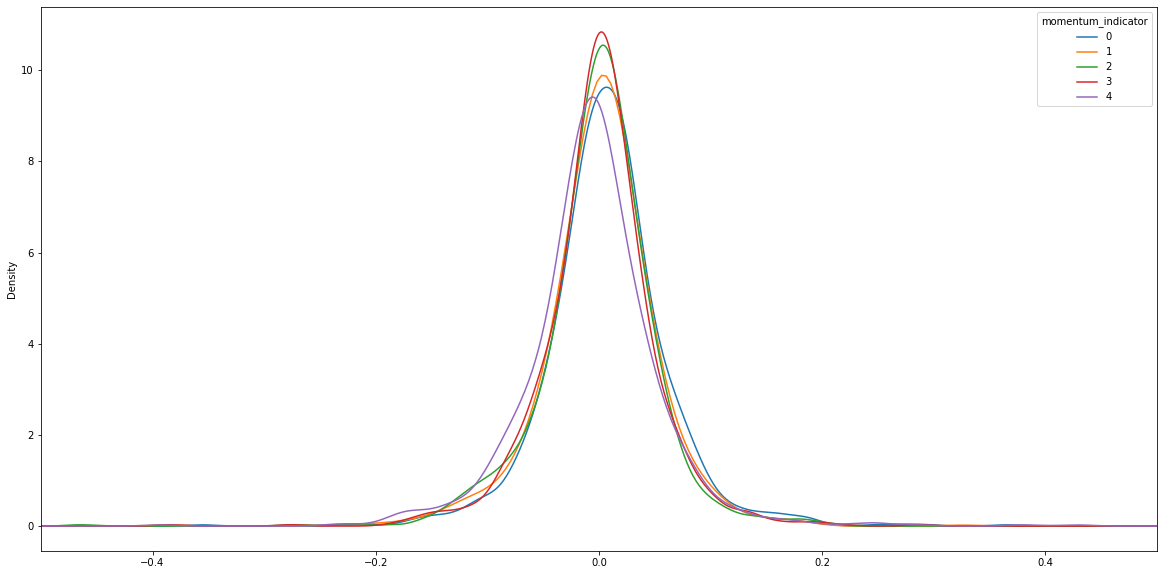

In [105]:
strategy_ret_df.plot(kind="density",figsize=(20,10),xlim=(-0.5,0.5))

In [106]:
strategy_cum_ret_df = (strategy_ret_df+1).cumprod()

<AxesSubplot:xlabel='date'>

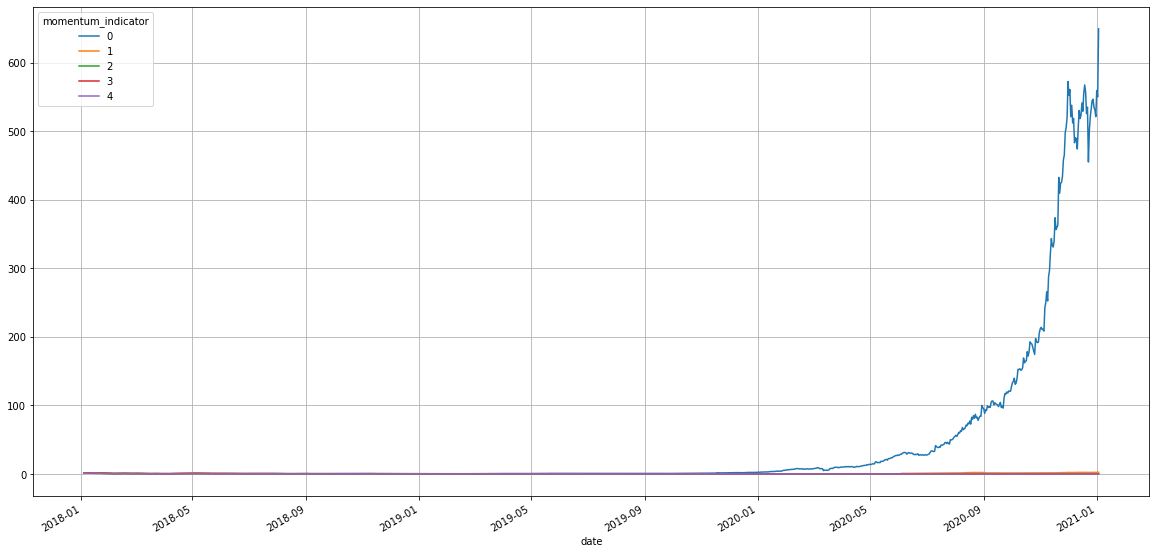

In [107]:
strategy_cum_ret_df.iloc[0:,:].plot(figsize=(20,10),grid=True)

<AxesSubplot:xlabel='date'>

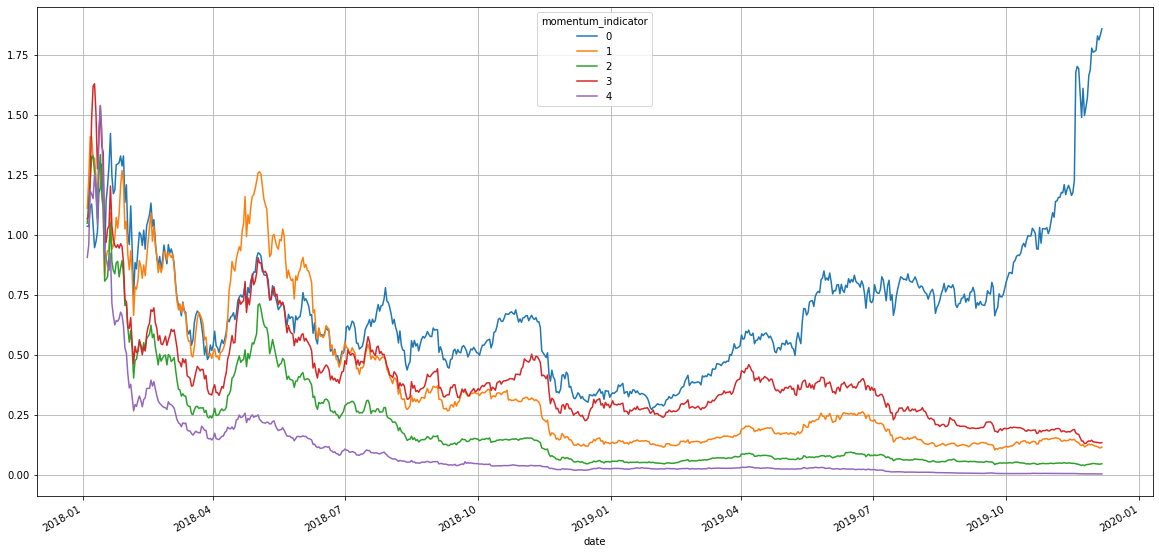

In [108]:
strategy_cum_ret_df.iloc[0:700,:].plot(figsize=(20,10),grid=True)

In [109]:
strategy_ret_df.mean()/strategy_ret_df.std()

momentum_indicator
0    0.135978
1    0.039262
2   -0.009033
3    0.003770
4   -0.102581
dtype: float64

Create a Long Short Strategy

In [110]:
long_short_return = strategy_ret_df.iloc[:,0] - strategy_ret_df.iloc[:,4]

In [111]:
long_short_return.mean()

0.013576260769219833

In [112]:
long_short_return.median()

0.011004278249708375

In [113]:
long_short_return.mean()/long_short_return.std()

0.24460107276217136

In [114]:
long_short_return.median()

0.011004278249708375

In [115]:
factor_return = (long_short_return+1).cumprod()

<AxesSubplot:xlabel='date'>

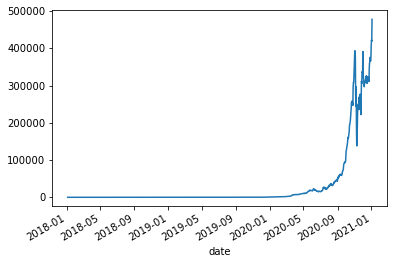

In [116]:
factor_return[0:].plot()